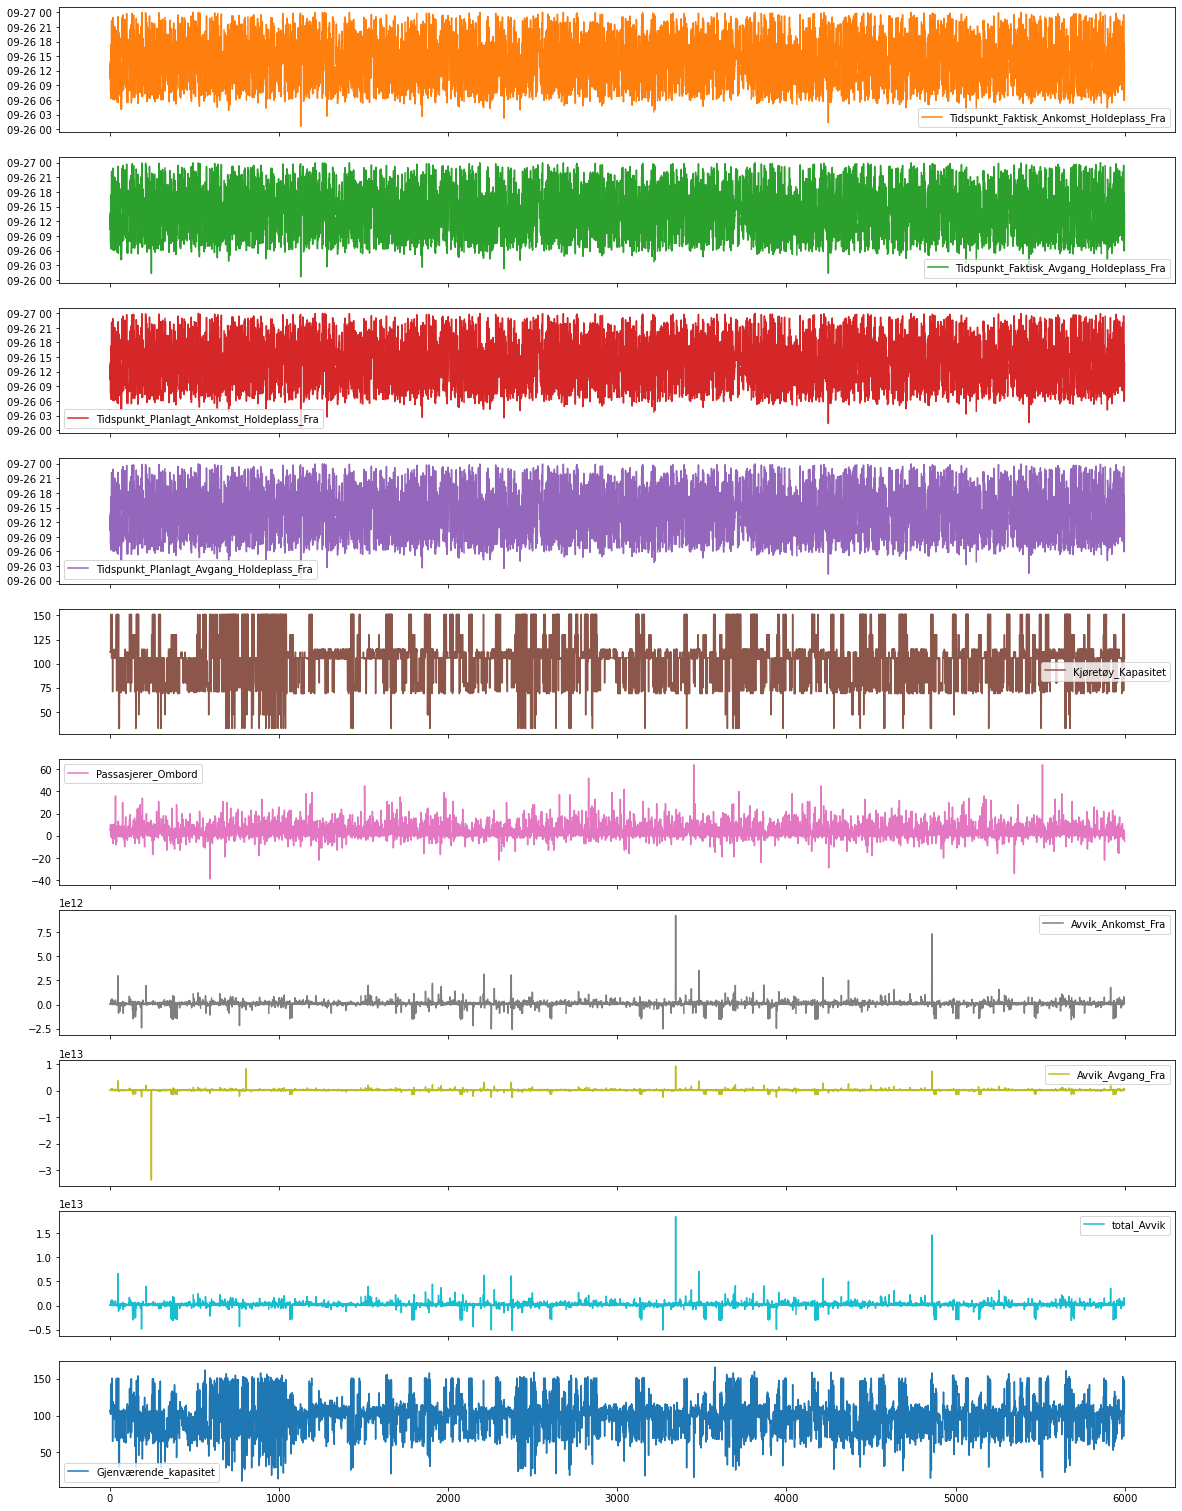

In [56]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv"


# 1.1
# Features to implement:
# Delay on arrival feature - how late is the bus and by what time? check column "Avvik_Ankomst_Fra"
# delay on departure feature - Delay before bus leaves bus stop. check column "Avvik_Avgang_Fra"
# total delay - included departure and arrival, how long is the delay? check column "total_Avvik"
# Remaining bus capacity - how much capacity remains for a bus when accounting for passengers? check collumn "Gjenværende_kapasitet"

df = pd.read_csv(url, sep=';')



# Delay on arrival feature - how late is the bus and by what time? check column "Avvik_Ankomst_Fra"
df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'], errors='coerce')
df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'], errors='coerce')

df['Avvik_Ankomst_Fra'] = df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra']-df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra']

df['Avvik_Ankomst_Fra'] = pd.to_timedelta(df['Avvik_Ankomst_Fra'], unit='s')


# delay on departure feature - Delay before bus leaves bus stop. check column "Avvik_Avgang_Fra"

df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'], errors='coerce')
df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'], errors='coerce')

df['Avvik_Avgang_Fra'] = df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra']-df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra']

df['Avvik_Avgang_Fra'] = pd.to_timedelta(df['Avvik_Avgang_Fra'], unit='s')



# total delay - included departure and arrival, how long is the delay? Adding delay of arrival and delay of departure and making a new
# column for totalt delay. check column "total_Avvik"
df['total_Avvik'] = df['Avvik_Avgang_Fra']+df['Avvik_Ankomst_Fra']


# Remaining bus capacity - how much capacity remains for a bus when accounting for passengers? Subtracting the capacity of the bus against the
# amount of passengers we can make a new column checking for remaining passenger capacity. check column "Gjenværende_kapasitet"
df['Gjenværende_kapasitet']  = df['Kjøretøy_Kapasitet']-df['Passasjerer_Ombord']

# check for no capacity left- If a bus has no capacity left display true. We are already checking for remaing capacity, therefore we can use that 
# to check for when remaining capcity reaches Zero/0. Check column "Ingen_Kapasitet"
df['Ingen_Kapasitet'] = df['Gjenværende_kapasitet'] ==0


df = pd.DataFrame(df, dtype='object')
#converting to objects here because we are managing several thousands of rows and therefore int is way too big to convert to a plot

axs = df.plot(subplots=True, figsize=(20, 30));
#creating plot for dataframe. 

plt.delaxes(axs[0])
#deleting reduntant plot for direction 
